<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/QQQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (QQQ) using the past 60 day stock price. 

In [165]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [166]:
#Get the stock quote
data = yf.download('QQQ', start=start_date, end=end_date)
#df = web.DataReader('QQQ', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,214.399994,216.160004,213.979996,216.160004,214.416458,30969400
2020-01-03,213.300003,215.470001,213.279999,214.179993,212.452408,27518900
2020-01-06,212.500000,215.589996,212.240005,215.559998,213.821289,21655300
2020-01-07,215.639999,216.139999,214.850006,215.529999,213.791519,22139300
2020-01-08,215.500000,218.139999,215.160004,217.149994,215.398438,26397300
...,...,...,...,...,...,...
2021-07-15,362.980011,363.190002,358.459991,360.519989,360.519989,53391600
2021-07-16,361.399994,362.410004,357.239990,357.600006,357.600006,47262000
2021-07-19,354.049988,355.179993,352.040009,354.670013,354.670013,64404600


In [167]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

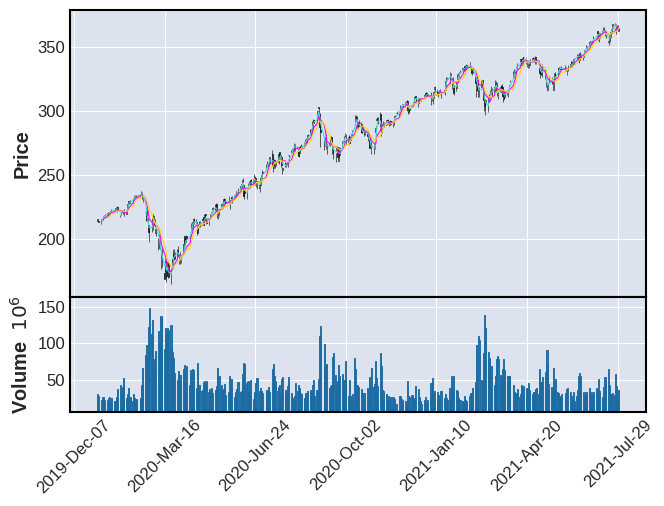

In [168]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [169]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [170]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.23525279],
       [0.22531248],
       [0.23224056],
       [0.23208996],
       [0.24022287],
       [0.24946034],
       [0.24664889],
       [0.25930015],
       [0.25493249],
       [0.2553843 ],
       [0.2659772 ],
       [0.2714996 ],
       [0.27099754],
       [0.27395951],
       [0.27757416],
       [0.26808573],
       [0.24499225],
       [0.26181032],
       [0.26361764],
       [0.26758375],
       [0.24986198],
       [0.26647927],
       [0.29203274],
       [0.29579799],
       [0.30568805],
       [0.3007179 ],
       [0.31462424],
       [0.31482502],
       [0.32617102],
       [0.3246649 ],
       [0.32802852],
       [0.32848033],
       [0.33977608],
       [0.32873136],
       [0.30608969],
       [0.26150911],
       [0.23128669],
       [0.23685926],
       [0.18243887],
       [0.18324214],
       [0.23655805],
       [0.20171693],
       [0.24559466],
       [0.21230983],
       [0.19438729],
       [0.1218435 ],
       [0.17475777],
       [0.130

In [171]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.23525279, 0.22531248, 0.23224056, 0.23208996, 0.24022287,
       0.24946034, 0.24664889, 0.25930015, 0.25493249, 0.2553843 ,
       0.2659772 , 0.2714996 , 0.27099754, 0.27395951, 0.27757416,
       0.26808573, 0.24499225, 0.26181032, 0.26361764, 0.26758375,
       0.24986198, 0.26647927, 0.29203274, 0.29579799, 0.30568805,
       0.3007179 , 0.31462424, 0.31482502, 0.32617102, 0.3246649 ,
       0.32802852, 0.32848033, 0.33977608, 0.32873136, 0.30608969,
       0.26150911, 0.23128669, 0.23685926, 0.18243887, 0.18324214,
       0.23655805, 0.20171693, 0.24559466, 0.21230983, 0.19438729,
       0.1218435 , 0.17475777, 0.13012701, 0.04026309, 0.11566843,
       0.        , 0.06446105, 0.03664844, 0.04196998, 0.00702844,
       0.0058236 , 0.07209198, 0.06526432, 0.11345947, 0.08032532])]
[0.11416231586744874]



In [172]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [173]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [174]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [175]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 35ms/step - loss: 0.0288


In [176]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [177]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [178]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [179]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

24.631296278555183

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


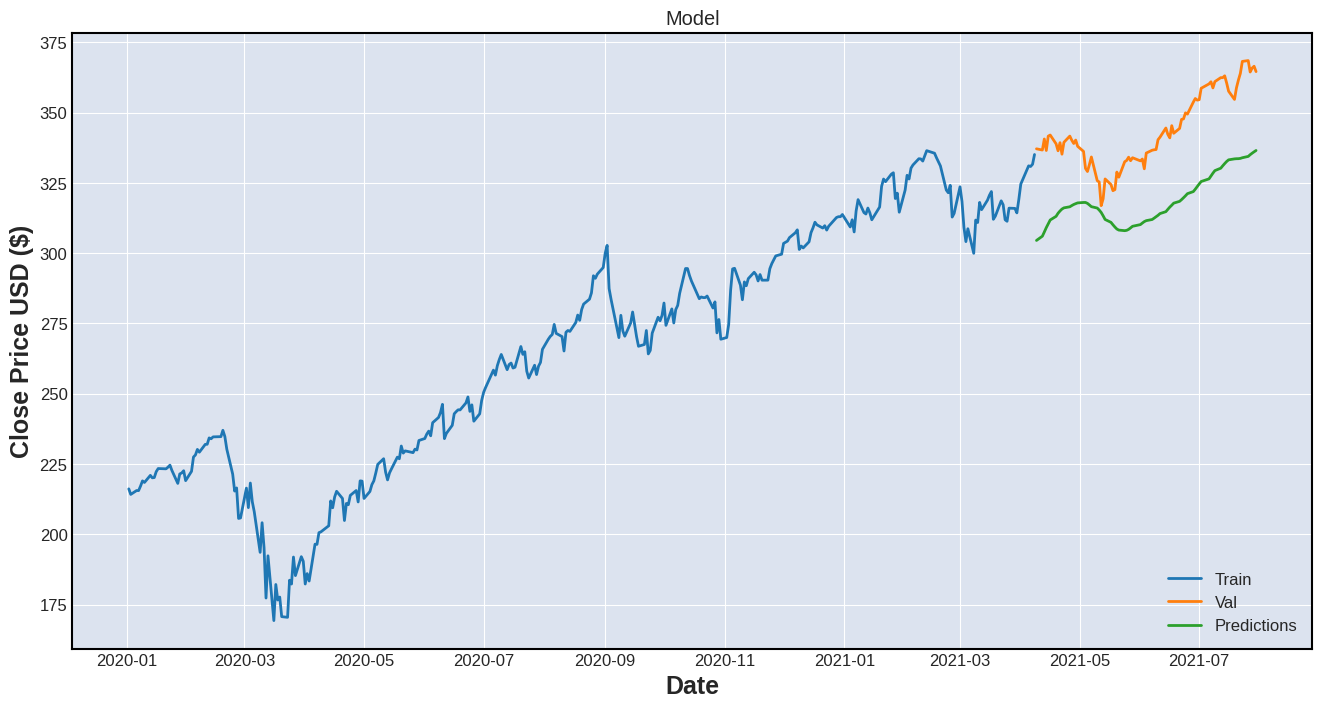

In [180]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [181]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,337.109985,304.516235
2021-04-12,336.670013,306.024750
2021-04-13,340.600006,307.514801
2021-04-14,336.510010,309.063660
2021-04-15,341.609985,310.426605
...,...,...
2021-07-26,368.489990,334.401489
2021-07-27,364.429993,335.015656
2021-07-28,365.829987,335.547485


In [182]:
#get the quote
apple_quote = yf.download('QQQ', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[336.87735]]
